## Import

In [1]:
import os

import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

## color and saving

In [2]:
color = "#9a3324"

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/example_zoomed_in_tracks"
os.chdir(folder_save)

fname_save_prefix = "zoomed_in_RNA_track-static-1"
switch_read_from_file = True
switch_savefig = True

## Raw data from file

In [3]:
if switch_read_from_file:
    df_load = pd.read_csv(fname_save_prefix + "-data.csv")
    t = df_load[df_load["variable"] == "t_s"]["value"].to_numpy(dtype=float)
    x = df_load[df_load["variable"] == "x_nm"]["value"].to_numpy(dtype=float)
    y = df_load[df_load["variable"] == "y_nm"]["value"].to_numpy(dtype=float)
    MSD = df_load[df_load["variable"] == "MSD_um2"]["value"].to_numpy(dtype=float)
    tau = df_load[df_load["variable"] == "tau_s"]["value"].to_numpy(dtype=float)
    length = MSD.shape[0]
    half_length = round(length / 2)

## Filtering and find track

In [4]:
if not switch_read_from_file:
    df = pd.read_csv("SPT_results_AIO_concat-0Dex_noTR_0hr.csv")

In [5]:
if not switch_read_from_file:
    df.astype(
        {
            "N_steps": int,
            "mean_stepsize_nm": float,
            "max_d_anytwo_nm": float,
            "alpha": float,
            "linear_fit_log10D": float,
            "linear_fit_log10D": float,
            "linear_fit_R2": float,
        }
    )
    df_static = df[
        (df["mean_stepsize_nm"] < 30) & (df["N_steps"] > 50) & (df["linear_fit_R2"] < 0.5)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

    df_constrained = df[
        (df["max_d_anytwo_nm"] > 300)
        & (df["alpha"] < 0.5)
        & (df["N_steps"] > 50)
        & (df["linear_fit_R2"] < 0.7)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

    df_free = df[
        (df["max_d_anytwo_nm"] > 200)
        & (df["alpha"] > 0.95)
        & (df["N_steps"] > 8)
        & (df["linear_fit_R2"] > 0.99)
    ].sort_values(by="max_d_anytwo_nm", ascending=False)

    df_badfitting = df[
        (df["max_d_anytwo_nm"] > 300)
        & (df["alpha"] < 0.3)
        & (df["N_steps"] > 30)
        & (df["linear_fit_R2"] < 0.2)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

In [6]:
if not switch_read_from_file:
    idx = 0

In [7]:
if not switch_read_from_file:
    df_from = df_static
    nm_per_pxl = 117
    s_per_frame = 0.02

    x = np.fromstring(df_from.iloc[idx]["list_of_x"][1:-1], sep=", ")
    y = np.fromstring(df_from.iloc[idx]["list_of_y"][1:-1], sep=", ")
    t = np.fromstring(df_from.iloc[idx]["list_of_t"][1:-1], sep=", ")
    MSD = np.fromstring(df_from.iloc[idx]["list_of_MSD_um2"][1:-1], sep=", ")
    tau = np.fromstring(df_from.iloc[idx]["list_of_tau_s"][1:-1], sep=", ")
    print("filename", str(df_from.iloc[idx]["filename"]))
    print("mean_x_pxl", str(df_from.iloc[idx]["mean_x_pxl"]))
    print("mean_y_pxl", str(df_from.iloc[idx]["mean_y_pxl"]))
    print("N_steps", str(df_from.iloc[idx]["N_steps"]))
    print("max_d_anytwo_nm", str(df_from.iloc[idx]["max_d_anytwo_nm"]))
    print("alpha", str(df_from.iloc[idx]["alpha"]))
    print("log10D", str(df_from.iloc[idx]["linear_fit_log10D"]))
    print("R2", str(df_from.iloc[idx]["linear_fit_R2"]))
    x = (x - (x.min() + x.max()) / 2) * nm_per_pxl
    y = (y - (y.min() + y.max()) / 2) * nm_per_pxl
    t = (t - t[0]) * s_per_frame

    print("idx", idx)
    idx += 1

    plt.figure(figsize=(5, 3))
    plt.plot(tau, MSD)
    plt.show()

## Plot RNA track

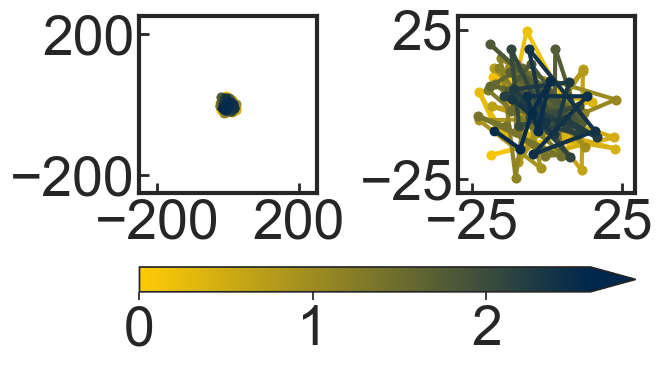

In [14]:
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=x.shape[0]
)
fontsize = 40
wspace = 0.8
# Adjust track
x_plot = x[:-5]
y_plot = y[:-5]
t_plot = t[:-5]
x_plot = x_plot - (x_plot.min() + x_plot.max()) / 2
y_plot = y_plot - (y_plot.min() + y_plot.max()) / 2

fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=wspace)
axs = gs.subplots()
for i in range(len(t_plot) - 1):
    axs[0].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )
for i in range(len(t_plot) - 1):
    axs[1].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )

# tick number and sizes
for i in range(2):
    axs[i].axis("scaled")
    axs[i].spines[:].set_linewidth(3)
    axs[i].tick_params(
        axis="both",
        which="major",
        labelsize=fontsize,
        direction="in",
        bottom=True,
        left=True,
        length=7,
        width=2,
    )

# xy_max = np.max([x_plot.max(), y_plot.max()]) + 20
# Immobile
xy_max = np.max([x_plot.max(), y_plot.max()]) + 5
axs[1].set_xlim(-xy_max, xy_max)
axs[1].set_ylim(-xy_max, xy_max)
# Constrained
# axs[1].set_xticks([-100, 100])
# axs[1].set_yticks([-100, 100])
# Normal
# axs[1].set_xticks([-600, 600])
# axs[1].set_yticks([-600, 600])
# Immobile
axs[1].set_xticks([-25, 25])
axs[1].set_yticks([-25, 25])
axs[0].set_xlim(-250, 250)
axs[0].set_ylim(-250, 250)
axs[0].set_xticks([-200, 200])
axs[0].set_yticks([-200, 200])

# color bar
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(t[0], t[-1]), cmap=cmap),
    ax=axs,
    orientation="horizontal",
    pad=0.2,
    drawedges=False,
    ticks=[0, 1, 2, 3],
    extendfrac=0.1,
    extend="max",
)
cbar.ax.tick_params(labelsize=fontsize)
# saving
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-track-twoscales.png",
        format="png",
        dpi=300,
        bbox_inches="tight",
    )
plt.show()

## Plot MSD-tau

In [9]:
def func(x, k, b):
    return k * x + b

In [18]:
tau

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ,
       1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32,
       1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54,
       1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74, 1.76,
       1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96, 1.98,
       2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
       2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
       2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 ])

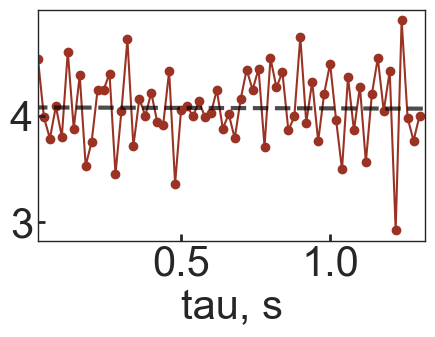

In [17]:
fontsize = 30
halflength = round(tau.shape[0] / 2)
plt.figure(figsize=(5, 3))
# Constrained
# plt_ends_at_idx = halflength - 15
# Normal
plt_ends_at_idx = halflength
plt.plot(
    tau[:plt_ends_at_idx],
    MSD[:plt_ends_at_idx]*10000,
    color=color,
    ls="-",
    marker="o",
)
popt, pcov = curve_fit(
    func,
    tau[:20],
    MSD[:20]*10000,
    # bounds=([0, 0], [np.inf, np.inf]),
)
k, b = popt
ref_x = np.linspace(0, tau[plt_ends_at_idx], 100)
plt.plot(
    ref_x,
    k * ref_x + b,
    color="black",
    ls="--",
    lw=3,
    alpha=0.7,
)
plt.xlim(tau[0], tau[plt_ends_at_idx])
# Constrained
# plt.xticks([0.1, 0.3, 0.5, 0.7])
# Normal
# plt.xticks([0.1, 0.3, 0.5])
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.gca().set_axisbelow(False)
plt.xlabel("tau, s", fontsize=fontsize)
plt.ylabel("")
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-MSDtau.png", format="png", dpi=300, bbox_inches="tight"
    )
plt.show()

## Angle Distribution

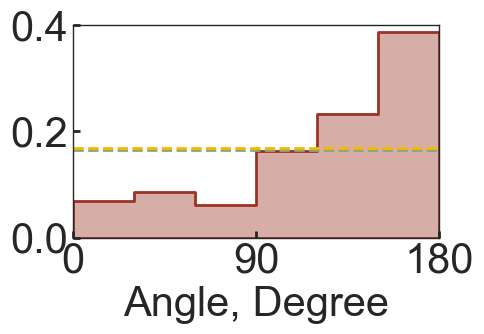

In [11]:
def calc_angle(x, y):
    # x and y at time 0 and time 1
    x0 = x[:-1]
    x1 = x[1:]
    y0 = y[:-1]
    y1 = y[1:]
    # unit vectors of all steps, and step 0 and step 1
    vector = np.array([x1 - x0, y1 - y0])
    # convert to complex number to use np.angle
    vector_complex = 1j * vector[1, :]
    vector_complex += vector[0, :]
    angles_eachstep = np.angle(vector_complex, deg=True)
    angles = np.ediff1d(angles_eachstep)  # between adjacent steps
    # convert all angles to within range (0,+-180) for output
    angles[angles < -180] = angles[angles < -180] + 360
    angles[angles > 180] = angles[angles > 180] - 360

    return angles


angles = calc_angle(x, y)
bins = 6
plt.figure(figsize=(5, 3.5))
sns.histplot(
    data=np.abs(angles),
    bins=bins,
    stat="probability",
    color=color,
    binrange=(0, 180),
    lw=2,
    element="step",
    alpha=0.4,
)
plt.axhline(1 / bins - 0.002, color="#87a878", ls="--", lw=2)
plt.axhline(1 / bins + 0.002, color="#f7b801", ls="--", lw=2)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.gca().ticklabel_format(
    axis="y",
    style="scientific",
    scilimits=(-2, 3),
)
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.gca().set_axisbelow(False)
plt.xlabel("Angle, Degree", fontsize=fontsize)
plt.ylabel("")
plt.xlim(0, 180)
plt.ylim(0, 0.4)
bins = np.linspace(0, 180, 3).astype(int)
plt.xticks(bins)
plt.tight_layout()
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-Angles.png", format="png", dpi=300, bbox_inches="tight"
    )
plt.show()

## Save data for replot

In [12]:
if not switch_read_from_file:
    value = np.concatenate([t, x, y, MSD, tau])
    variable = np.concatenate(
        [
            np.repeat("t_s", t.shape[0]),
            np.repeat("x_nm", x.shape[0]),
            np.repeat("y_nm", y.shape[0]),
            np.repeat("MSD_um2", MSD.shape[0]),
            np.repeat("tau_s", tau.shape[0]),
        ]
    )
    df_save = pd.DataFrame(
        {
            "variable": variable,
            "value": value,
        },
        dtype=object,
    )
    df_save.to_csv(fname_save_prefix + "-data.csv", index=False)